# Predict sale supermarket grocery with R - (Time Series)
## About Dataset
The dataset has data on orders placed by customers on a grocery delivery application.



In [1]:
# import library & install pakages
library(dplyr);
library(data.table);
require(forecast);
require(tseries);
require(tidyverse);


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: tseries

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ lubridate::h

In [2]:
Data_Sale=fread("/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv")
head(Data_Sale)

Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu


In [3]:
# select two columns - Date and Sales
Data_SaleSellected=Data_Sale[,c("Order Date","Sales")]
head(Data_SaleSellected)

Order Date,Sales
<chr>,<int>
11-08-2017,1254
11-08-2017,749
06-12-2017,2360
10-11-2016,896
10-11-2016,2355
06-09-2015,2305


## Preprocesing Data

In [4]:
#check format of Date
# 
unique(grepl('/',Data_SaleSellected$`Order Date`))
unique(grepl('-',Data_SaleSellected$`Order Date`))
# unique(Data_SaleSellected$`Order Date`)

[1] FALSE  TRUE

[1]  TRUE FALSE

## convert Date column to Date fromat

In [5]:
Data_SaleSellected$Date1=as.Date(Data_SaleSellected$`Order Date`,format="%m-%d-%Y")
Data_SaleSellected$Date2=as.Date(Data_SaleSellected$`Order Date`,format="%m/%d/%Y")
Data_SaleSellected$Date=Data_SaleSellected$Date1
Data_SaleSellected[is.na(Date)]$Date=Data_SaleSellected[is.na(Date)]$Date2
nrow(Data_SaleSellected[is.na(Date)])
Data_SaleSellected[is.na(Date)]

Data_SaleSellected$Date1=NULL
Data_SaleSellected$Date2=NULL
Data_SaleSellected$`Order Date`=NULL
head(Data_SaleSellected,10)

[1] 0

Order Date,Sales,Date1,Date2,Date
<chr>,<int>,<date>,<date>,<date>


Sales,Date
<int>,<date>
1254,2017-11-08
749,2017-11-08
2360,2017-06-12
896,2016-10-11
2355,2016-10-11
2305,2015-06-09
826,2015-06-09
1847,2015-06-09
791,2015-06-09


## Generate Time series

In [6]:
Data_SaleSellected=Data_SaleSellected[order(as.Date(Data_SaleSellected$Date)),]
head(Data_SaleSellected,10)


Sales,Date
<int>,<date>
864,2015-01-03
2033,2015-01-04
698,2015-01-04
759,2015-01-04
878,2015-01-05
2259,2015-01-06
1243,2015-01-06
1504,2015-01-06
1495,2015-01-06


In [7]:
#generate month
Data_SaleSellected$YM=substr(Data_SaleSellected$Date,1,7)
head(Data_SaleSellected,10)

Sales,Date,YM
<int>,<date>,<chr>
864,2015-01-03,2015-01
2033,2015-01-04,2015-01
698,2015-01-04,2015-01
759,2015-01-04,2015-01
878,2015-01-05,2015-01
2259,2015-01-06,2015-01
1243,2015-01-06,2015-01
1504,2015-01-06,2015-01
1495,2015-01-06,2015-01


In [8]:
## group by sale price per month
Data_SaleSellected=data.table(Data_SaleSellected)
Monthly_sale=Data_SaleSellected[,.(Sale=sum(Sales)), by=YM]
head(Monthly_sale,10)

YM,Sale
<chr>,<int>
2015-01,122497
2015-02,66030
2015-03,247156
2015-04,203258
2015-05,164263
2015-06,206064
2015-07,220986
2015-08,230161
2015-09,382200


In [9]:
SalePrice=Monthly_sale$Sale
head(SalePrice,10)

[1] 122497  66030 247156 203258 164263 206064 220986 230161 382200 241726

In [10]:
#generate time series object with 12 frequency (month)
tsSale=ts(SalePrice, start = c(2015, 1), frequency = 12)
min(Monthly_sale$YM)
max(Monthly_sale$YM)
tsSale

[1] "2015-01"

[1] "2018-12"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,122497,66030,247156,203258,164263,206064,220986,230161,382200,241726,480979,410279
2016,89009,90823,212164,237272,222722,205388,215776,229543,429658,249639,477720,472245
2017,131727,132982,238956,247773,332524,291454,315531,256089,546728,308026,551815,518307
2018,234739,166267,355704,310150,367411,354902,337092,331014,705680,443898,683410,687245


## Model (Arima)

In [11]:
# Automatically create ARIMA model
model <- auto.arima(tsSale)
model

Series: tsSale 
ARIMA(0,1,1)(0,1,0)[12] 

Coefficients:
          ma1
      -0.6350
s.e.   0.1352

sigma^2 = 1.723e+09:  log likelihood = -421.6
AIC=847.19   AICc=847.57   BIC=850.3

In [12]:
# Check Accuracy
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,8932.626,34939.86,25372.38,2.504547,8.82679,0.4231867,-0.136763


## Plot

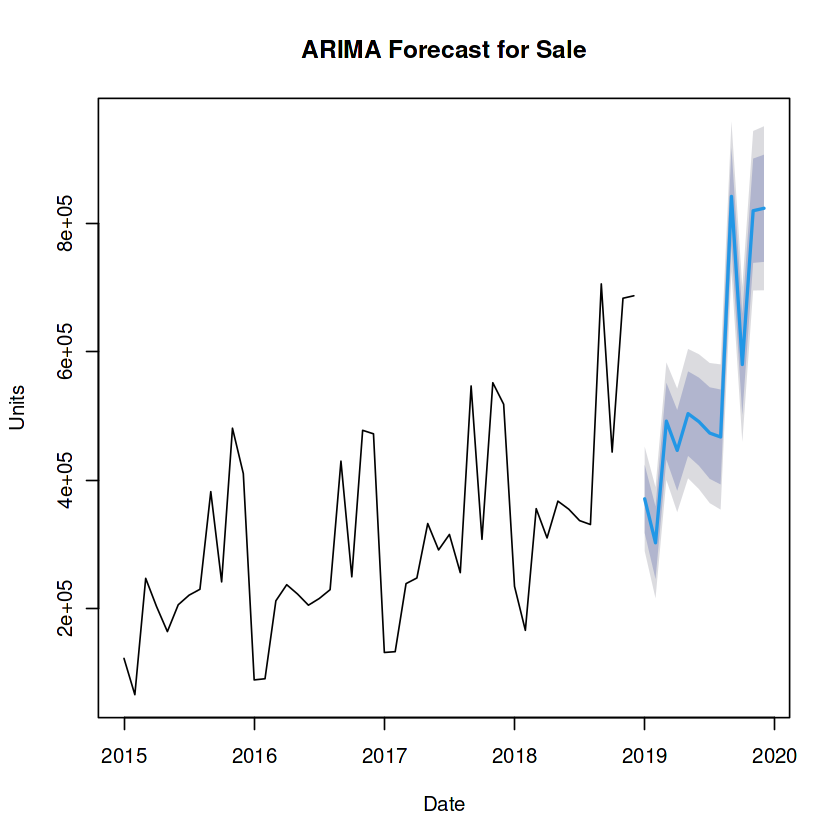

In [13]:
# Create a Simple Plot with a forecast for the next year
plot(forecast(model, 12), xlab = "Date", ylab = "Units", main = "ARIMA Forecast for Sale")

In [14]:
#get forcast value 
pred_values <- forecast(model, 12)
pred_values

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       371029.8 317826.6 424233.1 289662.4 452397.2
Feb 2019       302557.8 245922.2 359193.5 215941.0 389174.6
Mar 2019       491994.8 432123.2 551866.5 400429.1 583560.6
Apr 2019       446440.8 383499.4 509382.3 350180.2 542701.5
May 2019       503701.8 437833.5 569570.2 402964.9 604438.7
Jun 2019       491192.8 422522.3 559863.4 386170.3 596215.4
Jul 2019       473382.8 402020.0 544745.7 364242.8 582522.9
Aug 2019       467304.8 393347.6 541262.1 354197.0 580412.7
Sep 2019       841970.8 765507.2 918434.4 725029.9 958911.8
Oct 2019       580188.8 501298.4 659079.2 459536.4 700841.3
Nov 2019       819700.8 738456.1 900945.6 695447.8 943953.9
Dec 2019       823535.8 740003.1 907068.6 695783.5 951288.1

## time series to  log scale

In [15]:
# Transform time series to log scale
ltSale <- log(tsSale)
ltSale

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,11.71584,11.09786,12.41777,12.22223,12.00922,12.23594,12.30585,12.34653,12.85370,12.39556,13.08358,12.92459
2016,11.39649,11.41667,12.26511,12.37696,12.31368,12.23266,12.28200,12.34385,12.97074,12.42777,13.07678,13.06525
2017,11.78849,11.79797,12.38403,12.42027,12.71447,12.58264,12.66201,12.45328,13.21171,12.63794,13.22097,13.15832
2018,12.36623,12.02135,12.78185,12.64481,12.81424,12.77960,12.72811,12.70992,13.46692,13.00335,13.43485,13.44045


In [16]:
# Create new model on log scale series for seasonal decomposition
model2 <- stl(ltSale, s.window = "period")

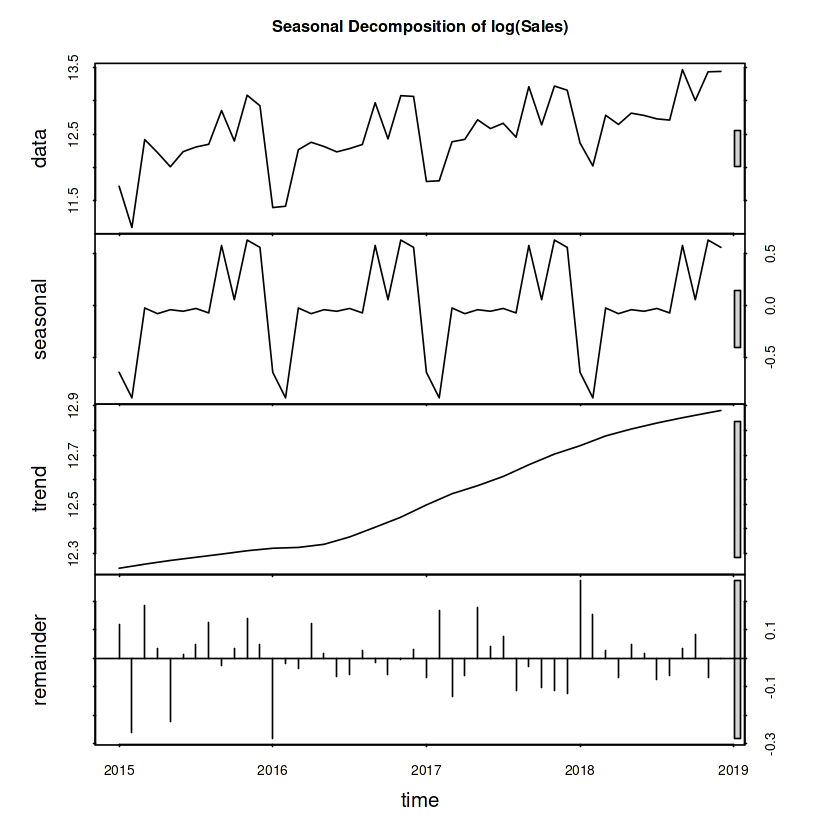

In [17]:
# Plot Seasonal Decomposition
plot(model2, main = "Seasonal Decomposition of log(Sales)")

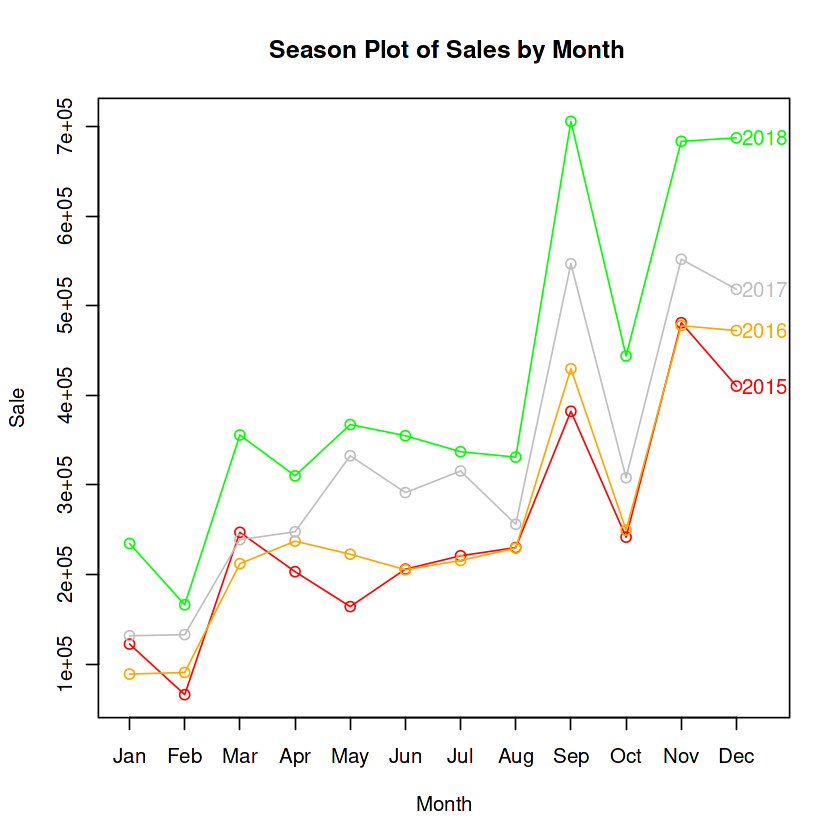

In [18]:
# Create a Season Plot
seasonplot(tsSale, year.labels = "TRUE", main = " Season Plot of Sales by Month", 
           xlab = "Month", ylab = "Sale", 
           col = c("red", "orange", "gray", "green", "blue", "purple", "black"))

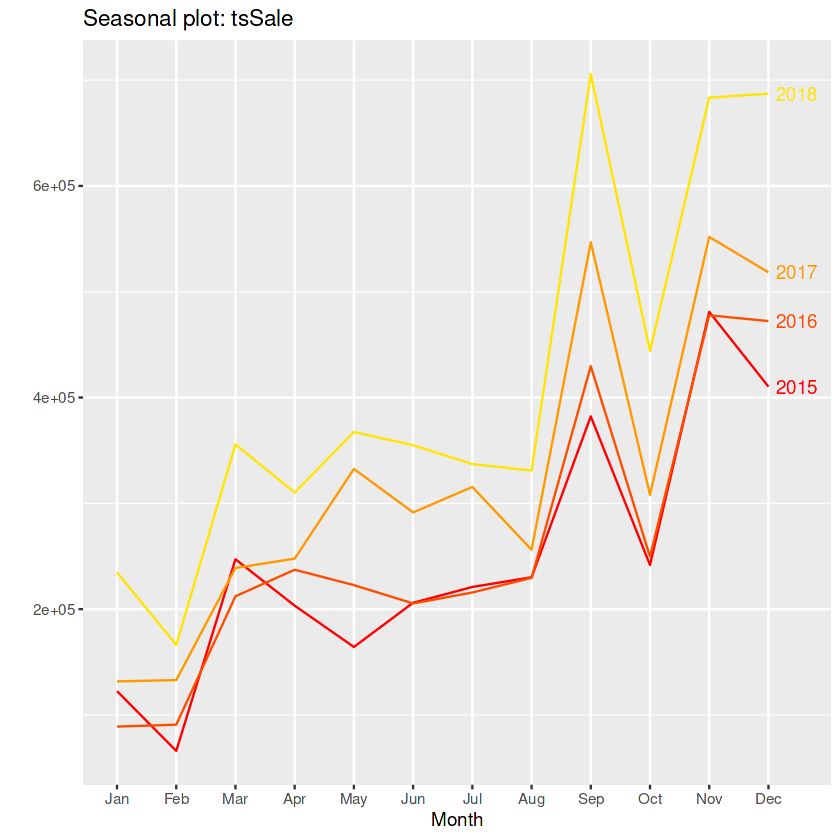

In [19]:
# Create a Season Plot
ggseasonplot(tsSale, year.labels = TRUE, col = rainbow(20))

In [20]:
#auto arima log sale
model3 <- auto.arima(ltSale)

In [21]:
# rbind acuraccy two arima model
modelAccuracy <- data.frame(accuracy(model))
modelAccuracy2 <- data.frame(accuracy(model3))

modelAccuracyFinal <- rbind(modelAccuracy, modelAccuracy2)
modelAccuracyFinal

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Training set,8.932626e+03,3.493986e+04,2.537238e+04,2.5045467,8.8267904,0.4231867,-0.13676304
Training set1,3.698147e-02,1.474478e-01,9.747297e-02,0.3076921,0.7885125,0.4616987,-0.06199853


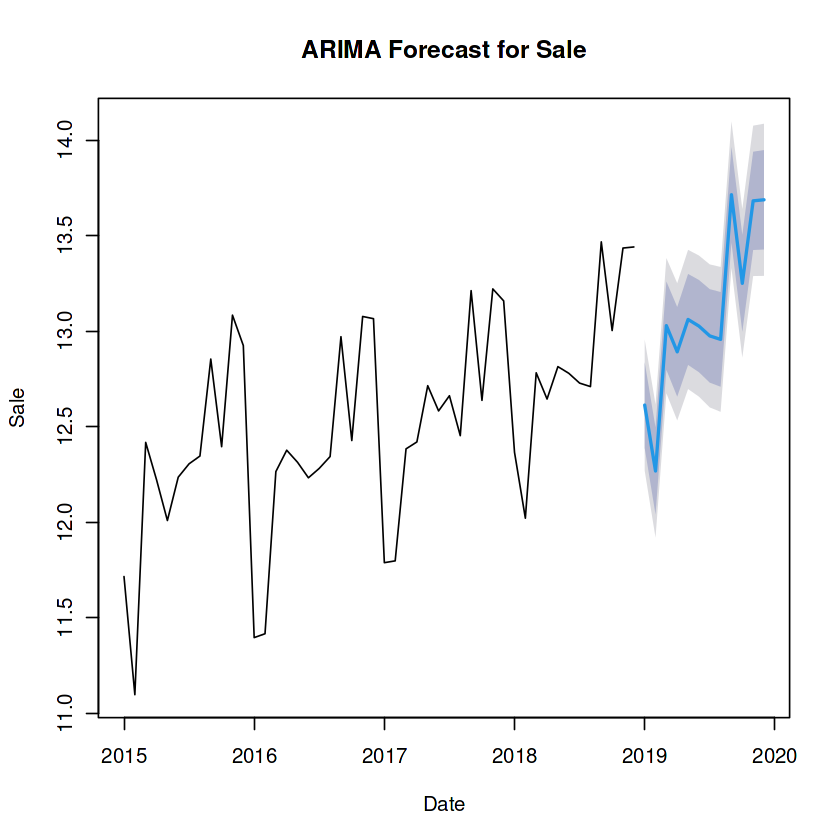

In [22]:
plot(forecast(model3, 12), xlab = "Date", ylab = "Sale", main = "ARIMA Forecast for Sale")


In [23]:
pred_values1 <- data.frame(forecast(model, 12))
pred_values2 <- data.frame(forecast(model3, 12))
pred_values2[,1:5] <- exp(pred_values2[,1:5])

#check
# pred_values1
# pred_values2
# Merge two forecast predictions (orginal and log)
mergedDF <- data.frame(Date = rownames(pred_values1), 
                       Original_Data_Forecast = pred_values1$Point.Forecast, 
                       Log_Transformed_Data_Forecast = pred_values2$Point.Forecast, 
                       Difference = round(pred_values1$Point.Forecast - pred_values2$Point.Forecast, 2))
mergedDF


Date,Original_Data_Forecast,Log_Transformed_Data_Forecast,Difference
<chr>,<dbl>,<dbl>,<dbl>
Jan 2019,371029.8,300482.2,70547.61
Feb 2019,302557.8,212833.3,89724.52
Mar 2019,491994.8,455325.8,36669.00
Apr 2019,446440.8,397013.6,49427.28
May 2019,503701.8,470311.6,33390.22
Jun 2019,491192.8,454299.2,36893.61
Jul 2019,473382.8,431501.2,41881.65
Aug 2019,467304.8,423720.9,43583.91
Sep 2019,841970.8,903319.4,-61348.61


In [24]:
pred_values2[,1:5]

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2019,300482.2,240055.1,376120.2,213153.9,423588.6
Feb 2019,212833.3,169440.1,267339.4,150174.6,301635.7
Mar 2019,455325.8,361248.7,573902.7,319592.3,648706.5
Apr 2019,397013.6,313919.7,502102.2,277223.5,568565.6
May 2019,470311.6,370637.3,596791.1,326733.0,676983.9
Jun 2019,454299.2,356841.7,578373.6,314023.8,657236.0
Jul 2019,431501.2,337835.3,551136.3,296787.3,627362.7
Aug 2019,423720.9,330682.2,542936.5,290010.8,619078.3
Sep 2019,903319.4,702745.2,1161140.6,615281.4,1326199.7
